In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [3]:
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [4]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'merged_fraud_data.csv')

# Read the CSV file into a DataFrame
merged_fraud_data = pd.read_csv(file_path)
merged_fraud_data.head()

user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

   device_id  source  browser  sex  age  ip_address  class  \
0      46780       2        4    0   30    16778864      0   
1      70073       2        0    0   34    16842045      0   
2      53448       0        2    1   29    16843656      0   
3      92195       1        0    0   30    16938732      0   
4     107434       2        0    0   37    16971984      0   

   lower_bound_ip_address  upper_bound_ip_address  country    time_diff  \
0              16778240.0              16779263.0        7  1008.948611   
1              16809984.0              16842751.0      162   342.121389   
2              16843264.0              16843775.0       36   554.870556   
3              16924672.0              16941055.0       36  2122.471389   
4              16941056.0              16973823.0      162  2847.105278   

   hour_of_day  day_of_week  transaction_count  
0            3            6                  1  
1           20            2                  1  
2           23            5                  1  
3           16            5                  1  
4            4            1                  1

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Split your dataset into training and test sets
X = merged_fraud_data[['user_id','purchase_value', 'source', 'browser', 'sex', 'age', 'ip_address',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'time_diff', 'hour_of_day', 'day_of_week', 'transaction_count']]
y = merged_fraud_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# prompt: print unique class and its amout

import pandas as pd
# Assuming you have the merged_fraud_data DataFrame loaded as shown in your code.

# Assuming 'class' is the column you want to analyze
unique_classes = merged_fraud_data['class'].unique()
class_counts = merged_fraud_data['class'].value_counts()

print("Unique classes and their counts:")
for class_value in unique_classes:
  print(f"class: {class_value}, Count: {class_counts[class_value]}")

Unique classes and their counts:
class: 0, Count: 116878
class: 1, Count: 12268


In [6]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import shap
from lime import lime_tabular
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

# Function to log metrics and explainability
def log_metrics_and_explainability(model, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Log parameters (if any)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Log metrics
        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name} Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(f"{model_name} Model saved to MLflow")



c:\Users\Bereket\Desktop\Projects\fraud-detection-model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Logistic Regression
log_metrics_and_explainability(LogisticRegression(), "LogisticRegression", X_train, X_test, y_train, y_test)

# Decision Tree
log_metrics_and_explainability(DecisionTreeClassifier(), "DecisionTree", X_train, X_test, y_train, y_test)

# Random Forest
log_metrics_and_explainability(RandomForestClassifier(n_estimators=100, random_state=42), "RandomForest", X_train, X_test, y_train, y_test)

# Gradient Boosting
log_metrics_and_explainability(GradientBoostingClassifier(), "GradientBoosting", X_train, X_test, y_train, y_test)

# Multi-Layer Perceptron (MLP)
log_metrics_and_explainability(MLPClassifier(), "MLP", X_train, X_test, y_train, y_test)

2024/10/22 12:56:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression Model accuracy: 0.9062717770034843
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23419
           1       0.35      0.00      0.01      2411

    accuracy                           0.91     25830
   macro avg       0.63      0.50      0.48     25830
weighted avg       0.86      0.91      0.86     25830

LogisticRegression Model saved to MLflow


2024/10/22 12:56:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree Model accuracy: 0.9032520325203252
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     23419
           1       0.48      0.57      0.52      2411

    accuracy                           0.90     25830
   macro avg       0.72      0.75      0.73     25830
weighted avg       0.91      0.90      0.91     25830

DecisionTree Model saved to MLflow


2024/10/22 12:57:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest Model accuracy: 0.9569879984514131
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23419
           1       1.00      0.54      0.70      2411

    accuracy                           0.96     25830
   macro avg       0.98      0.77      0.84     25830
weighted avg       0.96      0.96      0.95     25830

RandomForest Model saved to MLflow


2024/10/22 12:57:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting Model accuracy: 0.9570267131242741
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23419
           1       1.00      0.54      0.70      2411

    accuracy                           0.96     25830
   macro avg       0.98      0.77      0.84     25830
weighted avg       0.96      0.96      0.95     25830

GradientBoosting Model saved to MLflow


2024/10/22 12:58:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLP Model accuracy: 0.9047231900890438
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23419
           1       0.11      0.00      0.01      2411

    accuracy                           0.90     25830
   macro avg       0.51      0.50      0.48     25830
weighted avg       0.83      0.90      0.86     25830

MLP Model saved to MLflow


In [ ]:
# CNN Example
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# CNN Training
def log_cnn_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="CNN"):
        cnn_model = create_cnn_model((X_train.shape[1], 1))
        cnn_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = cnn_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = cnn_model.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)
        print(f"CNN Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        cnn_model.save("cnn_model.h5")
        mlflow.log_artifact("cnn_model.h5")

log_cnn_model(X_train.values, X_test.values, y_train.values, y_test.values)

# Similar implementation can be done for RNN and LSTM using TensorFlow/Keras.

# End of neural models


808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 0.3098
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


CNN Model accuracy: 0.906658947467804
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23419
           1       0.00      0.00      0.00      2411

    accuracy                           0.91     25830
   macro avg       0.45      0.50      0.48     25830
weighted avg       0.82      0.91      0.86     25830



In [ ]:
# RNN Example
def create_rnn_model(input_shape):
    model = models.Sequential([
        layers.SimpleRNN(64, input_shape=input_shape, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RNN Training
def log_rnn_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="RNN"):
        rnn_model = create_rnn_model((X_train.shape[1], 1))
        rnn_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = rnn_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = rnn_model.predict(np.expand_dims(X_test, axis=2))
        y_pred = (y_pred > 0.5).astype(int)
        print(f"RNN Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        rnn_model.save("rnn_model.h5")
        mlflow.log_artifact("rnn_model.h5")

log_rnn_model(X_train.values, X_test.values, y_train.values, y_test.values)


808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9068 - loss: 0.3099
808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


RNN Model accuracy: 0.906658947467804
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23419
           1       0.00      0.00      0.00      2411

    accuracy                           0.91     25830
   macro avg       0.45      0.50      0.48     25830
weighted avg       0.82      0.91      0.86     25830



In [ ]:
# LSTM Example
def create_lstm_model(input_shape):
    model = models.Sequential([
        layers.LSTM(64, input_shape=input_shape, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Training
def log_lstm_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="LSTM"):
        lstm_model = create_lstm_model((X_train.shape[1], 1))
        lstm_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = lstm_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = lstm_model.predict(np.expand_dims(X_test, axis=2))
        y_pred = (y_pred > 0.5).astype(int)
        print(f"LSTM Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        lstm_model.save("lstm_model.h5")
        mlflow.log_artifact("lstm_model.h5")

log_lstm_model(X_train.values, X_test.values, y_train.values, y_test.values)


808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9068 - loss: 0.3097
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


LSTM Model accuracy: 0.906658947467804
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23419
           1       0.00      0.00      0.00      2411

    accuracy                           0.91     25830
   macro avg       0.45      0.50      0.48     25830
weighted avg       0.82      0.91      0.86     25830



**Model Explaiability**
* Random Forest: the best performed model
> - all other model performed well for class 0 but poor for class 1 due to class imbalance in the dataset. However, random forest performed better regardless of the class imbalance.

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23419
           1       1.00      0.54      0.70      2411

    accuracy                           0.96     25830
   macro avg       0.98      0.77      0.84     25830
weighted avg       0.96      0.96      0.95     25830



In [8]:
import pickle
from datetime import datetime

# Assuming 'model' is your trained LSTM model

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Format the filename
filename = f'../models/rf-fraud.pkl'

# Save the model with pickle
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print(f'Model saved as {filename}')

Model saved as ../models/rf-fraud.pkl


In [ ]:
rf.feature_importances_

array([0.06313998, 0.04707854, 0.00934961, 0.01467895, 0.00790231,
       0.04130287, 0.06187474, 0.05394116, 0.05357306, 0.02488482,
       0.56579148, 0.03638019, 0.02010227, 0.        ])

In [ ]:
import shap

# Create a SHAP explainer for your model
explainer = shap.TreeExplainer(rf)  # for tree-based models

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
X_test.shape, shap_values.shape

((25830, 14), (25830, 14, 2))

In [ ]:
# Extract SHAP values for class 1 (fraud)
shap_values_class_0 = shap_values[:, :, 0]  # This will give you a shape of (56962, 29)
shap_values_class_1 = shap_values[:, :, 1]  # This will give you a shape of (56962, 29)
shap_values_class_1.shape

(25830, 14)

**Beeswarm plot**

- Y-axis indicates the feature names in order of importance from top to bottom.
- X-axis represents the SHAP value, which indicates the degree of change in log odds.
- The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.

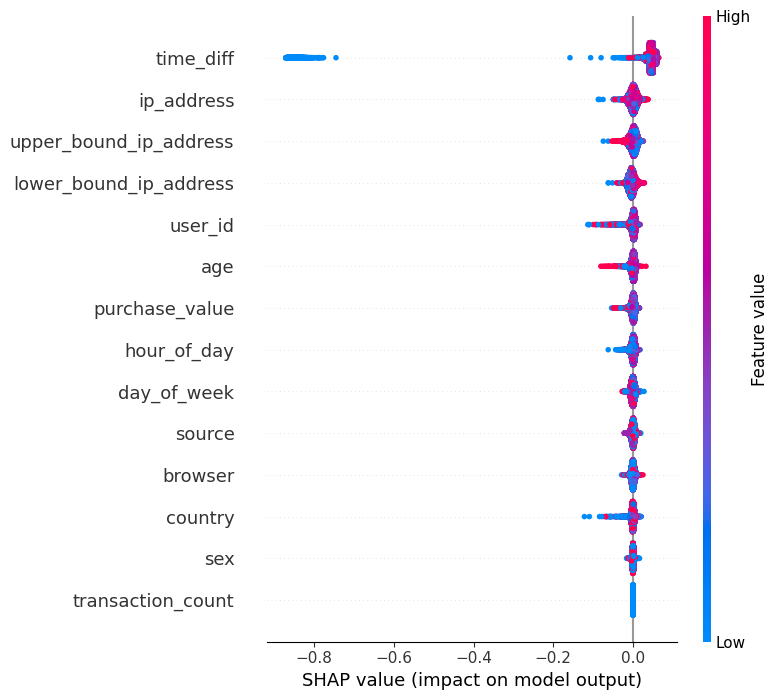

In [ ]:
# Summary Plot
shap.summary_plot(shap_values_class_0, X_test)

* time_diff feature is mostly low with negative shap value indicating that lower time_diff tend to negatively affect the output class 0(non fraudulent transaction).

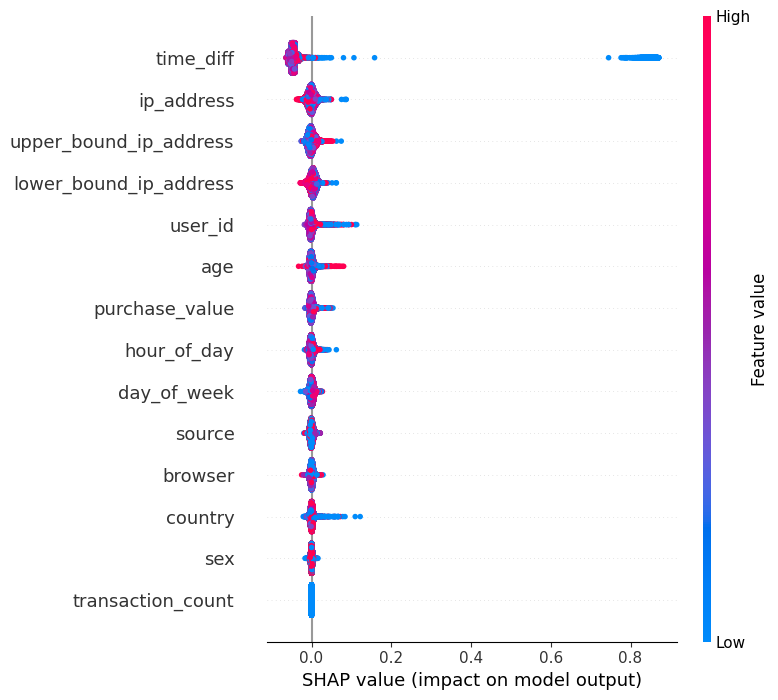

In [ ]:
# Summary Plot
shap.summary_plot(shap_values_class_1, X_test)

* time_diff feature is mostly low with positive shap value indicating that lower time_diff tend to positively affect the output class 1 (fraudulent transaction).

**Forceplot**

In [ ]:
shap.initjs()
# Force Plot for a single prediction (e.g., 1st sample)
shap.force_plot(explainer.expected_value[1], shap_values_class_0[0], X_test.iloc[0])

- We can clearly see that 2.517e+9 ip_aress, 8 country and 420.9 time_diff have contributed to negative to class 0 (non fraudulent transaction).

In [ ]:
shap.initjs()
# Force Plot for a single prediction (e.g., 1st sample)
shap.force_plot(explainer.expected_value[1], shap_values_class_1[0], X_test.iloc[0])

- We can clearly see that zero browser, 2 source and 3 hour_of_day have contributed to negative to class 1 (fraudulent transaction).

**Dependence Plot**

* A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature i.e. purchase_value. On average, purchase_value have a mostly positive effect on the model.

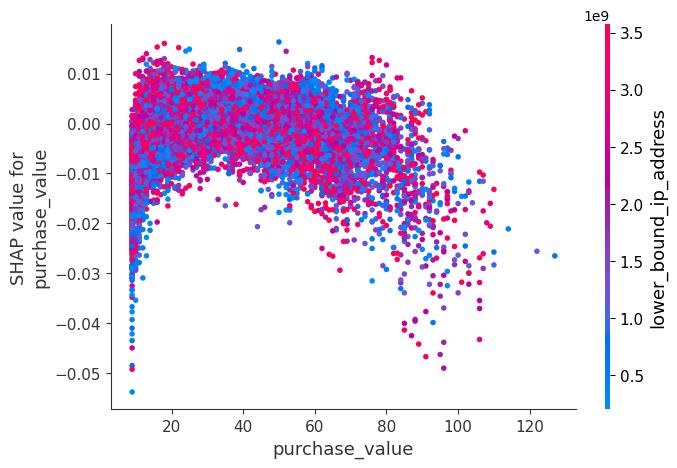

In [ ]:
# Dependence Plot (for the feature 'purchase_value')
shap.dependence_plot("purchase_value", shap_values_class_0, X_test)

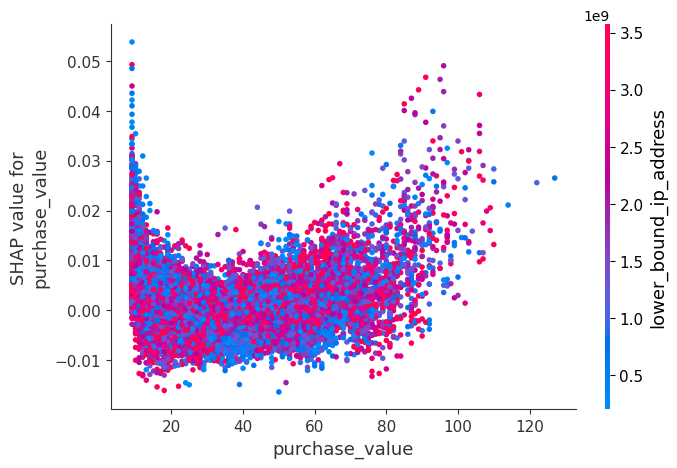

In [ ]:
# Dependence Plot (for the feature 'purchase_value')
shap.dependence_plot("purchase_value", shap_values_class_1, X_test)

**LIME**

*  LIME focuses on explaining individual predictions rather than providing global insights into the entire model.

In [ ]:
# Initialize the LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=X_train.columns,
                                              class_names=['Non-Fraud', 'Fraud'],
                                              mode='classification')


In [ ]:
# Choose a test instance to explain (for example, the first instance)
instance_to_explain = X_test.values[0]

# Explain the prediction for the chosen instance
exp = explainer.explain_instance(instance_to_explain, rf.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)


* The result contains three main pieces of information from left to right: (1) the model’s predictions, (2) features contributions, and (3) the actual value for each feature.

* We can observe that the first instant is predicted to be non-fraud  with 96% confidence. The reasons that led the model to make this decision is because:

 - The lower_bound_ip_address is more than 1905262592.00
 - ip_address is more than 1905670692.50
 - 0.00 < sex <= 1.00 and others specified in the figure
 and Those values can be verified from the table on the right.

In [ ]:
# Choose a test instance to explain (for example, the first instance)
instance_to_explain = X_test.values[1]

# Explain the prediction for the chosen instance
exp = explainer.explain_instance(instance_to_explain, rf.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)